# Library Import

In [1]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [2]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/GWAS")

data_euro_1 = pd.read_csv('34187551-GCST90014288-GO_0007568.h.tsv.gz', sep='\t')
data_euro_2 = pd.read_csv('34187551-GCST90014289-GO_0007568.h.tsv.gz', sep='\t')
data_euro_3 = pd.read_csv('34187551-GCST90014290-GO_0007568.h.tsv.gz', sep='\t')
data_euro_4 = pd.read_csv('34187551-GCST90014292-GO_0007568.h.tsv.gz', sep='\t')

os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/GWAS")

data_afri_1 = pd.read_csv('34187551-GCST90014294-GO_0007568.h.tsv.gz', sep='\t')
data_afri_2 = pd.read_csv('34187551-GCST90014295-GO_0007568.h.tsv.gz', sep='\t')
data_afri_3 = pd.read_csv('34187551-GCST90014296-GO_0007568.h.tsv.gz', sep='\t')
data_afri_4 = pd.read_csv('34187551-GCST90014298-GO_0007568.h.tsv.gz', sep='\t')

# Index Creation

In [44]:
def Create_Indices(data1, data2, data3, data4, Filtering_Threshold):
    
    # Resetting the index
    data1.index = np.arange(len(data1))
    data2.index = np.arange(len(data2))
    data3.index = np.arange(len(data3))
    data4.index = np.arange(len(data4))

    # Isolating chromosomes
    snp_index_1 = []
    snp_index_2 = []
    snp_index_3 = []
    snp_index_4 = []

    for i in range(23):
        snp_index_1.append(data1.hm_rsid.loc[np.where(data1.hm_chrom==i+1)])
        snp_index_2.append(data2.hm_rsid.loc[np.where(data2.hm_chrom==i+1)])
        snp_index_3.append(data3.hm_rsid.loc[np.where(data3.hm_chrom==i+1)])
        snp_index_4.append(data4.hm_rsid.loc[np.where(data4.hm_chrom==i+1)])
        
    snp_index_overlap = []

    for i in range(23):
        l1 = list(set(snp_index_1[i]).intersection(snp_index_2[i]))
        l2 = list(set(l1).intersection(snp_index_3[i]))
        l3 = list(set(l2).intersection(snp_index_4[i]))

        snp_index_overlap.append(pd.Series(l3).dropna())
    
    # Isolating SNP Subsets
    filtered_snp_index_1 = []
    filtered_snp_index_2 = []
    filtered_snp_index_3 = []
    filtered_snp_index_4 = []


    for i in range(23):
        filtered_snp_index_1.append(list(set(data1.hm_rsid.loc[np.where(data1.p_value<Filtering_Threshold)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_2.append(list(set(data2.hm_rsid.loc[np.where(data2.p_value<Filtering_Threshold)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_3.append(list(set(data3.hm_rsid.loc[np.where(data3.p_value<Filtering_Threshold)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_4.append(list(set(data4.hm_rsid.loc[np.where(data4.p_value<Filtering_Threshold)]).intersection(snp_index_aloha[i])))
    
    snp_index_overlap_filtered = []
    for i in range(23):
        l1 = list(set(filtered_snp_index_1[i]).intersection(filtered_snp_index_2[i]))
        l2 = list(set(l1).intersection(filtered_snp_index_3[i]))
        l3 = list(set(l2).intersection(filtered_snp_index_4[i]))

        snp_index_overlap_filtered.append(pd.Series(l3).dropna())
        
    return(snp_index_overlap, snp_index_overlap_filtered)
    

# Data Export

In [45]:
def Export_Individual(data1, data2, data3, data4, Filtering_Threshold, Population):
    
    snp_index_overlap, snp_index_overlap_filtered = Create_Indices(data1, data2, data3, data4, Filtering_Threshold)

    data1.index = data1.hm_rsid
    data2.index = data2.hm_rsid
    data3.index = data3.hm_rsid
    data4.index = data4.hm_rsid
    
    for CHROM in range(23):
    
    
        data_1_full = data1.loc[snp_index_overlap[CHROM]]
        data_2_full = data2.loc[snp_index_overlap[CHROM]]
        data_3_full = data3.loc[snp_index_overlap[CHROM]]
        data_4_full = data4.loc[snp_index_overlap[CHROM]]

        data_1_filtered = data1.loc[snp_index_overlap_filtered[CHROM]]
        data_2_filtered = data2.loc[snp_index_overlap_filtered[CHROM]]
        data_3_filtered = data3.loc[snp_index_overlap_filtered[CHROM]]
        data_4_filtered = data4.loc[snp_index_overlap_filtered[CHROM]]

    
    
    
    
        TRAIT_1_full = data_1_full[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_full=TRAIT_1_full.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_full = data_2_full[
        ['beta','standard_error']
        ]
        TRAIT_3_full = data_3_full[
        ['beta','standard_error']
        ]
        TRAIT_4_full = data_4_full[
        ['beta','standard_error']
        ]

        S_XY_full = TRAIT_1_full
        S_XY_full['trait2_b']=TRAIT_2_full['beta']
        S_XY_full['trait2_se']=TRAIT_2_full['standard_error']
        S_XY_full['trait3_b']=TRAIT_3_full['beta']
        S_XY_full['trait3_se']=TRAIT_3_full['standard_error']
        S_XY_full['trait4_b']=TRAIT_4_full['beta']
        S_XY_full['trait4_se']=TRAIT_4_full['standard_error']


    
    
    
    
    
        TRAIT_1_filtered = data_1_filtered[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_filtered=TRAIT_1_filtered.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_filtered = data_2_filtered[
        ['beta','standard_error']
        ]
        TRAIT_3_filtered = data_3_filtered[
        ['beta','standard_error']
        ]
        TRAIT_4_filtered = data_4_filtered[
        ['beta','standard_error']
        ]

        S_XY_filtered = TRAIT_1_filtered
        S_XY_filtered['trait2_b']=TRAIT_2_filtered['beta']
        S_XY_filtered['trait2_se']=TRAIT_2_filtered['standard_error']
        S_XY_filtered['trait3_b']=TRAIT_3_filtered['beta']
        S_XY_filtered['trait3_se']=TRAIT_3_filtered['standard_error']
        S_XY_filtered['trait4_b']=TRAIT_4_filtered['beta']
        S_XY_filtered['trait4_se']=TRAIT_4_filtered['standard_error']
    
    
        #S_XY Export
        S_XY_full.to_csv('{}/Jupyter_Exports/Individual Analysis/S_XY_full/S_XY_full{}.csv'.format(Population, CHROM),index=True)
        S_XY_filtered.to_csv('{}/Jupyter_Exports/Individual Analysis/S_XY_full/S_XY_filtered{}.csv'.format(Population, CHROM),index=True)
        
        print("Chromosome {} complete".format(CHROM))

# Subset Creation

In [46]:
def Create_Subsets(data1, data2, data3, data4, Filtering_Threshold):
    
    snp_index_overlap, snp_index_overlap_filtered = Create_Indices(data1, data2, data3, data4, Filtering_Threshold)
    
    data1.index = data1.hm_rsid
    data2.index = data2.hm_rsid
    data3.index = data3.hm_rsid
    data4.index = data4.hm_rsid
    
    Created_Subsets = []
    
    for CHROM in range(23):
    
  

        data_1_filtered = data1.loc[snp_index_overlap_filtered[CHROM]]
        data_2_filtered = data2.loc[snp_index_overlap_filtered[CHROM]]
        data_3_filtered = data3.loc[snp_index_overlap_filtered[CHROM]]
        data_4_filtered = data4.loc[snp_index_overlap_filtered[CHROM]]


        TRAIT_1_filtered = data_1_filtered[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_filtered=TRAIT_1_filtered.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_filtered = data_2_filtered[
        ['beta','standard_error']
        ]
        TRAIT_3_filtered = data_3_filtered[
        ['beta','standard_error']
        ]
        TRAIT_4_filtered = data_4_filtered[
        ['beta','standard_error']
        ]

        S_XY_filtered = TRAIT_1_filtered
        S_XY_filtered['trait2_b']=TRAIT_2_filtered['beta']
        S_XY_filtered['trait2_se']=TRAIT_2_filtered['standard_error']
        S_XY_filtered['trait3_b']=TRAIT_3_filtered['beta']
        S_XY_filtered['trait3_se']=TRAIT_3_filtered['standard_error']
        S_XY_filtered['trait4_b']=TRAIT_4_filtered['beta']
        S_XY_filtered['trait4_se']=TRAIT_4_filtered['standard_error']
    
    
     
        Created_Subsets.append(S_XY_filtered)
        
        print("Chromosome {} complete".format(CHROM+1))
        
    return(Created_Subsets)

# Calculating Subset overlap between populations

In [47]:
def Overlap_Subset(Afri_Subsets, Euro_Subsets):
    
    lengths = []
    indices = []
    
    for CHROM in range(23):
        
        afri_chrom_filtered = Afri_Subsets[CHROM]
        eu_chrom_filtered = Euro_Subsets[CHROM]

        snp_index_fil_eu = eu_chrom_filtered.index
        snp_index_fil_afri = afri_chrom_filtered.index

        l1 = list(set(snp_index_fil_eu).intersection(snp_index_fil_afri))
    
        indices.append(l1)
        lengths.append(len(l1))
    
    return(indices, lengths)

In [48]:
def Export_Filtered_Overlapping_Subsets_For_Meta_Analysis(Afri_Subsets, Euro_Subsets, Export_Location):
    
    Indices, Lengths = Overlap_Subset(Afri_Subsets, Euro_Subsets)

    for CHROM in range(23):
        
        afri_chrom_filtered = Afri_Subsets[CHROM]
        eu_chrom_filtered = Euro_Subsets[CHROM]

        eu_chrom_filtered.index = eu_chrom_filtered.index    
        afri_chrom_filtered.index = afri_chrom_filtered.index

        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports/Meta Analysis/{}".format(Export_Location))

        META_S_XY_filtered = eu_chrom_filtered.loc[Indices[CHROM]]
    
        META_S_XY_filtered.to_csv('META_S_XY_filtered{}.csv'.format(CHROM))
    
        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports/Meta Analysis/{}".format(Export_Location))

        META_S_XY_filtered = afri_chrom_filtered.loc[Indices[CHROM]]#.drop('hm_rsid',axis=1)

        META_S_XY_filtered.to_csv('META_S_XY_filtered{}.csv'.format(CHROM))

    return(Lengths)

# Calculating Full overlap between populations

In [49]:
def Overlap_Full():
    
    indices = []
    
    for CHROM in range(23):

        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports/Meta Analysis/FULL")

        afri_chrom_full = pd.read_csv('S_XY_full{}.csv'.format(CHROM))
    
        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports/Meta Analysis/FULL")

        eu_chrom_full = pd.read_csv('S_XY_full{}.csv'.format(CHROM))

        snp_index_ful_eu = eu_chrom_full.hm_rsid
        snp_index_ful_afri = afri_chrom_full.hm_rsid
    
        l2 = list(set(snp_index_ful_eu).intersection(snp_index_ful_afri))
    
        indices.append(l2)
    
    return(indices)#, lengths)

In [50]:
def Export_Full_Overlapping_Subsets_For_Meta_Analysis(Export_Location):
    
    Indices = Overlap_Full()

    for CHROM in range(23):
  
        eu_chrom_full.index = eu_chrom_full.hm_rsid
    
        afri_chrom_full.index = afri_chrom_full.hm_rsid

        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports/Meta Analysis/{}".format(Export_Location))

        META_S_XY_full = eu_chrom_full.loc[l2].drop('hm_rsid',axis=1)
    
        META_S_XY_full.to_csv('META_S_XY_full{}.csv'.format(CHROM))
        
        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports/Meta Analysis/{}".format(Export_Location))

        META_S_XY_full = afri_chrom_full.loc[l2].drop('hm_rsid',axis=1)

        META_S_XY_full.to_csv('META_S_XY_full{}.csv'.format(CHROM)) 

# Function Execution

### European cohort

#### Exporting the preprocessed files for the individual metaCCA analysis

In [51]:
#Export_Individual(data_euro_1,data_euro_2,data_euro_3,data_euro_4, 
                    #Filtering_Threshold = 0.05, Population = 'European')

#### Creating the subsets containing overlapping snps between the two populations

In [52]:
#Euro_Subsets = Create_Subsets(data_euro_1, data_euro_2, data_euro_3, data_euro_4, Filtering_Threshold = 0.5)

### African American cohort

#### Exporting the preprocessed files for the individual metaCCA analysis

In [53]:
#Export_Individual(data_afri_1,data_afri_2,data_afri_3,data_afri_4,
                    #Filtering_Threshold = 0.05, Population = 'African')

#### Creating the subsets containing overlapping snps between the two populations

In [54]:
#Afri_Subsets = Create_Subsets(data_afri_1, data_afri_2, data_afri_3, data_afri_4, Filtering_Threshold = 0.5)

#### Exporting the preprocessed subset files for the meta metaCCA analysis

/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Chromosome ID')

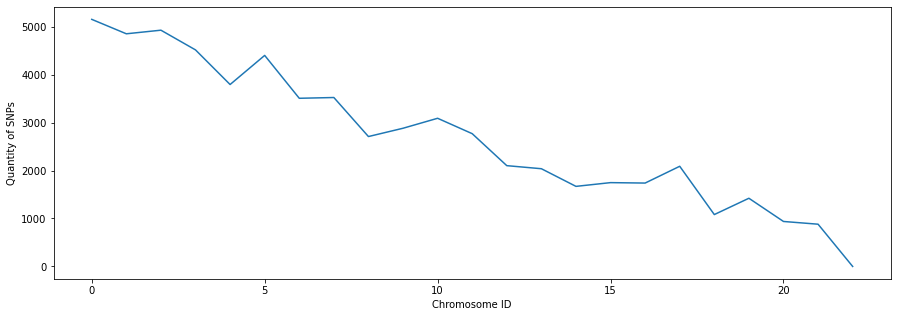

In [41]:
#Lengths = Export_Filtered_Overlapping_Subsets_For_Meta_Analysis(Afri_Subsets, Euro_Subsets, Export_Location='0.5')

#### Exporting the preprocessed full files for the meta metaCCA analysis

In [ ]:
#Export_Full_Overlapping_Subsets_For_Meta_Analysis(Export_Location)

### Plotting the overlapping subset sizes 

In [ ]:
plt.figure(figsize =(15,5) )
sns.lineplot(np.arange(23),Lengths)
plt.ylabel('Quantity of SNPs')
plt.xlabel('Chromosome ID')

# Results Import

In [112]:
def Results_Import(Import_Location):

    os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/Meta Analysis Results/{}".format(Import_Location))

    result = []
    p_value = []
    significant_RSID = []
    
    for CHROM in range(23):
        try:
            results = pd.read_csv('{}_Meta_Results_Chrom_{}.csv'.format(Import_Location, CHROM+1),index_col=0)
        
            p_values = 10**(-results['-log10(p-val)'])
        
            p_value.append(p_values)
        
            print("Number of significant associations in Chromosome {} BEFORE correction: ".format(CHROM+1)
                  ,len(p_values.iloc[np.where(p_values<0.05)]))
    
            adjusted_p_values = p_values*len(data_euro_1)
        
            significant_RSID.extend(results.index[np.where(adjusted_p_values<0.05)])
            
            p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
            
            print("Number of significant associations in Chromosome {} AFTER correction: ".format(CHROM+1),len(p_values_corrected))
            
        except:FileNotFoundError
        pass
    
    return p_value, significant_RSID

In [113]:
p_value, significant_RSID = Results_Import(Import_Location = 0.05)

Number of significant associations in Chromosome 3 BEFORE correction:  69
Number of significant associations in Chromosome 3 AFTER correction:  69


# Published Associations

In [121]:
response = requests.get('https://www.ebi.ac.uk/gwas/rest/api/efoTraits/GO_0007568/associations')
GWAS_EBI=response.json()

In [122]:
published_snps=[]

for i in range(len(GWAS_EBI['_embedded']['associations'])):
    published_snps.append(GWAS_EBI['_embedded']['associations'][i]['loci'][0]['strongestRiskAlleles'][0]['riskAlleleName'])
    
print("Number of PUBLISHED significant associations: ",len(published_snps))

Number of PUBLISHED significant associations:  209


# Plotting GWAS

In [ ]:
data1.index = data1.hm_rsid
data2.index = data2.hm_rsid
data3.index = data3.hm_rsid
data4.index = data4.hm_rsid

plt.figure(figsize=(15,5))

sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[0])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[0])].p_value),color='b',label="GrimAge")
sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[0])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[0])].p_value),color='r',label="Hannum")
sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[0])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[0])].p_value),color='g',label="Epigenetic")
sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[0])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[0])].p_value),color='y',label="PhenoAge")

for i in range(22):
    sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[i+1])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[i+1])].p_value),color='b')#,label="GrimAge")
    sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[i+1])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[i+1])].p_value),color='r')#,label="Hannum")
    sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[i+1])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[i+1])].p_value),color='g')#,label="Epigenetic")
    sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[i+1])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[i+1])].p_value),color='y')#,label="PhenoAge")

plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Plotting metaCCA Results

Text(0.5, 0, 'Chromosome ID')

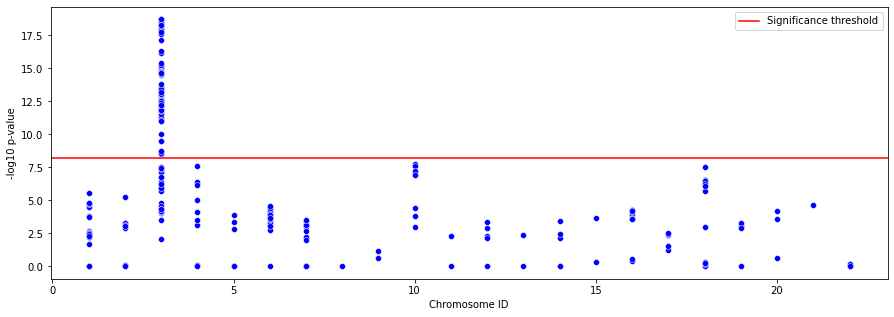

In [78]:
import seaborn as sns
data_euro_1.index = data_euro_1.hm_rsid
plt.figure(figsize=(15,5))
for CHROM in range(23):
    sns.scatterplot(x=data_euro_1.loc[p_value[CHROM].index].hm_chrom,y=-np.log10(p_value[CHROM]),color='b')#label="Chromosome {}".format(CHROM+1))
plt.axhline(y = -np.log10(0.05/len(data_euro_1)), color = 'r', linestyle = '-', label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Detecting Novel Associations

In [79]:
significant_snps_gwas = []

significant_snps_gwas.extend(data_euro_1.hm_rsid.iloc[np.where(data_euro_1.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_2.hm_rsid.iloc[np.where(data_euro_2.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_3.hm_rsid.iloc[np.where(data_euro_3.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_4.hm_rsid.iloc[np.where(data_euro_4.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_1.hm_rsid.iloc[np.where(data_afri_1.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_2.hm_rsid.iloc[np.where(data_afri_2.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_3.hm_rsid.iloc[np.where(data_afri_3.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_4.hm_rsid.iloc[np.where(data_afri_4.p_value*len(data_euro_1)<0.05)])

In [114]:
main_list = list(set(significant_RSID) - set(significant_snps_gwas))

In [115]:
print('RSIDs of novel associations: ', main_list)

RSIDs of novel associations:  ['rs11717358', 'rs2811492', 'rs2335236', 'rs6439135', 'rs2712371', 'rs2811500', 'rs2001703', 'rs2811489', 'rs9838579', 'rs4481171', 'rs9879928', 'rs6806687', 'rs56141228', 'rs2811499', 'rs7647837', 'rs9880064', 'rs9841041', 'rs2712412', 'rs58977394', 'rs6801890', 'rs67445542', 'rs1127030', 'rs9842276', 'rs4481172', 'rs7650934', 'rs7624160', 'rs7627549', 'rs7650156', 'rs2811497', 'rs7613073', 'rs2002849', 'rs9844071', 'rs4494950', 'rs1697', 'rs3122175', 'rs2712419', 'rs9289332', 'rs4443194', 'rs2253151', 'rs2811491', 'rs4857918', 'rs2878370', 'rs9852825', 'rs2712381', 'rs9841987', 'rs2811490', 'rs11717399', 'rs7641584', 'rs10934859', 'rs6787559', 'rs2811488', 'rs2712409', 'rs2712417']


In [105]:
#main_list_015 = main_list
main_list_05 = main_list

# P-values of novel associations

In [ ]:
new_list = list(set(main_list_05) - set(main_list_015))

In [118]:
sig_p_value = []
for i in range(23):
    for j in range(len(new_list)):
        try:sig_p_value.append(p_value[i][new_list[j]]*len(data1))
        except:KeyError
        pass

In [120]:
new_list + sig_p_value

['rs9813845', 'rs9841161', 'rs9828893', 'rs2712405', 'rs2253144', 'rs2712404']

In [88]:
final_results_table = pd.DataFrame()
final_results_table['rsid']=new_list
final_results_table['p_value']=sig_p_value


ValueError: Length of values (0) does not match length of index (59)

In [ ]:
final_results_table